### Notes on this project:

This is a part of the module on "Handling Missing Data" as part of the data science foundations course in Codecademy.

The teaching of this module, compared with most others in the course, has been by way of articles.

The contents of this project is largely guided by an article where they take you through the techniques and procedures of dealing with missing data.

This is different from other codecademy projects where they are Q&A format or the portfolio projects which are entirely self-guided.

### 1) Explore Data

In [5]:
import pandas as pd

In [19]:
#Import dataset into pandas df
df = pd.read_csv('developer_dataset.csv')
print(df.columns)

Index(['RespondentID', 'Year', 'Country', 'Employment', 'UndergradMajor',
       'DevType', 'LanguageWorkedWith', 'LanguageDesireNextYear',
       'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'Hobbyist', 'OrgSize', 'YearsCodePro',
       'JobSeek', 'ConvertedComp', 'WorkWeekHrs', 'NEWJobHunt',
       'NEWJobHuntResearch', 'NEWLearn'],
      dtype='object')


C:\Users\thoma\AppData\Local\Temp\ipykernel_27288\408447222.py:2: DtypeWarning: Columns (18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('developer_dataset.csv')


In [7]:
#Check to see how many observations
print(df.count())

RespondentID              111209
Year                      111209
Country                   111209
Employment                109425
UndergradMajor             98453
DevType                   100433
LanguageWorkedWith        102018
LanguageDesireNextYear     96044
DatabaseWorkedWith         85859
DatabaseDesireNextYear     74234
PlatformWorkedWith         91609
PlatformDesireNextYear     85376
Hobbyist                   68352
OrgSize                    54804
YearsCodePro               94793
JobSeek                    60556
ConvertedComp              91333
WorkWeekHrs                51089
NEWJobHunt                 19127
NEWJobHuntResearch         18683
NEWLearn                   24226
dtype: int64


In [8]:
#Perform summary statistics on numerical columns
print(df.describe())

        RespondentID           Year  YearsCodePro  ConvertedComp   WorkWeekHrs
count  111209.000000  111209.000000  94793.000000   9.133300e+04  51089.000000
mean    19262.039709    2018.854832      9.547045   1.251777e+05     41.051670
std     11767.011322       0.777503      7.548931   2.461218e+05     13.833929
min         1.000000    2018.000000      0.000000   0.000000e+00      1.000000
25%      9268.000000    2018.000000      4.000000   4.600000e+04     40.000000
50%     18535.000000    2019.000000      8.000000   7.900000e+04     40.000000
75%     28347.000000    2019.000000     14.000000   1.200000e+05     42.000000
max     42857.000000    2020.000000     50.000000   2.000000e+06    475.000000


### 2) Delete highly missing data

In [10]:
#Check what % of data missing in each column
maxRows = df['RespondentID'].count()
 
print('% Missing Data:')
print((1 - df.count() / maxRows) * 100)

#Can safely remove columns with 60% or more missing data
df.drop(['NEWJobHunt','NEWJobHuntResearch','NEWLearn'],
    axis=1,
    inplace=True)

% Missing Data:
RespondentID               0.000000
Year                       0.000000
Country                    0.000000
Employment                 1.604187
UndergradMajor            11.470295
DevType                    9.689863
LanguageWorkedWith         8.264619
LanguageDesireNextYear    13.636486
DatabaseWorkedWith        22.794918
DatabaseDesireNextYear    33.248208
PlatformWorkedWith        17.624473
PlatformDesireNextYear    23.229235
Hobbyist                  38.537349
OrgSize                   50.719816
YearsCodePro              14.761395
JobSeek                   45.547573
ConvertedComp             17.872654
WorkWeekHrs               54.060373
NEWJobHunt                82.800852
NEWJobHuntResearch        83.200101
NEWLearn                  78.215792
dtype: float64


### 3) Analyse developers by country

                RespondentID
Country                     
Canada                  8979
China                   2072
France                  6861
Germany                16215
Japan                   1049
Mexico                  1918
Spain                   4534
United Kingdom         15854
United States          53727


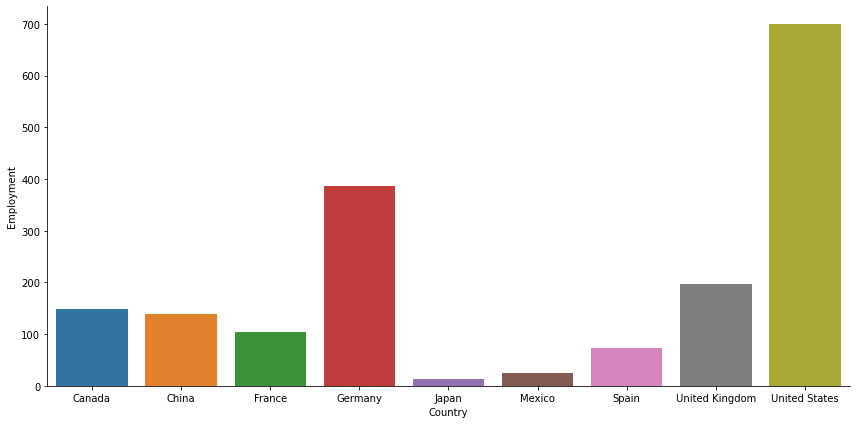

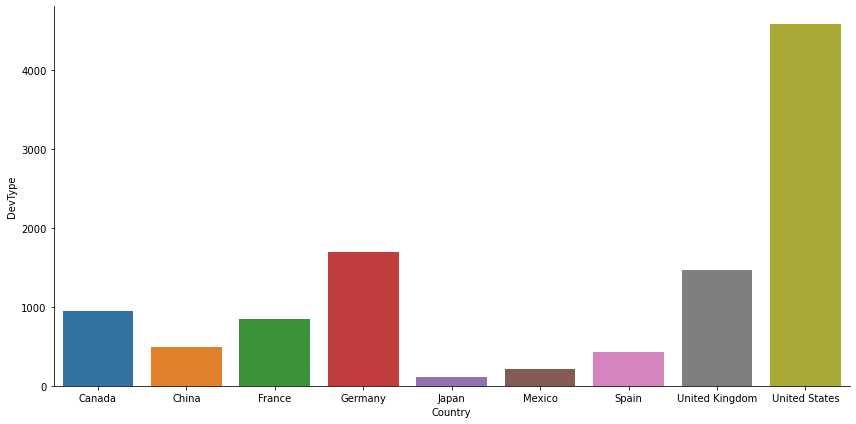

In [14]:
#Check the relationship between the source country, employment type, and developer type and the "missingness" of the data.
import seaborn as sns
import matplotlib.pyplot as plt
 
print(df[['RespondentID','Country']].groupby('Country').count())
 
missingData = df[['Employment','DevType']].isnull().groupby(df['Country']).sum().reset_index()
 
A=sns.catplot(
    data=missingData, kind="bar",
    x="Country", y="Employment",
    height = 6, aspect = 2)
B=sns.catplot(
    data=missingData, kind="bar",
    x="Country", y="DevType",
    height = 6, aspect = 2)

Observations drawn from the above:

Missing data appears to scale in relation to the size of each country (e.g. US has significantly more respondents and missing data than Japan)

Missing data can be categorised as "Missing Completely at Random" (MCAR). Hence, can safely delete observations with missing data in these columns.

In [16]:
df.dropna(subset = ['Employment','DevType'],
    inplace = True,
    how = 'any')

C:\Users\thoma\AppData\Local\Temp\ipykernel_27288\1455783356.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  devdf.loc[devdf['DevType'].str.contains('back-end'), 'BackEnd'] = True
C:\Users\thoma\AppData\Local\Temp\ipykernel_27288\1455783356.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  devdf.loc[devdf['DevType'].str.contains('front-end'), 'FrontEnd'] = True
C:\Users\thoma\AppData\Local\Temp\ipykernel_27288\1455783356.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

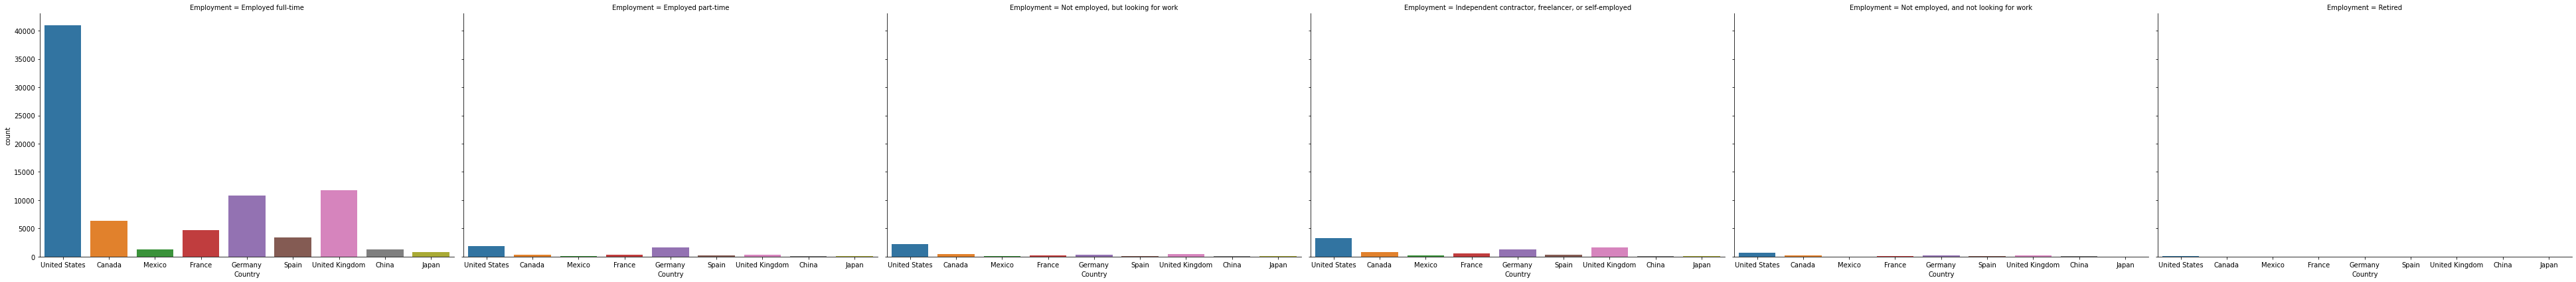

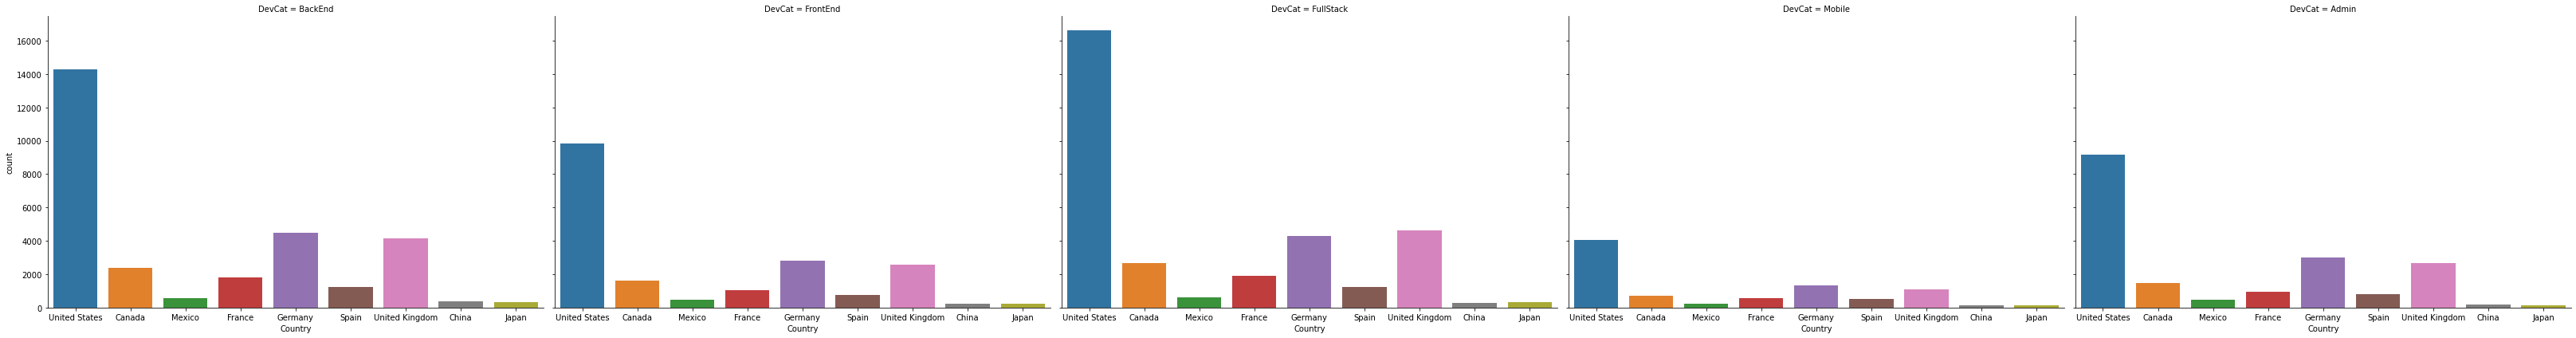

In [18]:
#Aggregate employment data by key developer roles
empfig = sns.catplot(x="Country", col="Employment",
                data=df, kind="count",
                height=6, aspect=1.5);
 
# Focus on a few of the key developer types outlined in the Stack Overflow survey
devdf = df[['Country','DevType']]
devdf.loc[devdf['DevType'].str.contains('back-end'), 'BackEnd'] = True
devdf.loc[devdf['DevType'].str.contains('front-end'), 'FrontEnd'] = True
devdf.loc[devdf['DevType'].str.contains('full-stack'), 'FullStack'] = True
devdf.loc[devdf['DevType'].str.contains('mobile'), 'Mobile'] = True
devdf.loc[devdf['DevType'].str.contains('administrator'), 'Admin'] = True
 
devdf = devdf.melt(id_vars=['Country'], 
    value_vars=['BackEnd','FrontEnd','FullStack','Mobile','Admin'], 
    var_name='DevCat',
    value_name='DevFlag')
 
devdf.dropna(how='any', inplace=True)
 
devFig = sns.catplot(x="Country", col="DevCat",
                data=devdf, kind="count",
                height=6, aspect=1.5);



Observations:

Vast majority of developers are full time employed

Majority have skills in front-end, back-end, or full-stack.

### 4) Investigate developer undergraduate majors

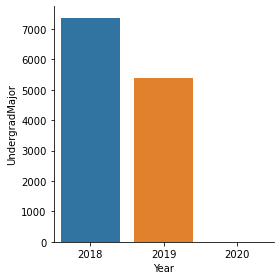

In [20]:
#Investigate missing undergrad data by year
missingUndergrad = df['UndergradMajor'].isnull().groupby(df['Year']).sum().reset_index()
 
sns.catplot(x="Year", y="UndergradMajor",
                data=missingUndergrad, kind="bar",
                height=4, aspect=1);

In [21]:
#Apply next observation carried backwards to fill in missing
df = df.sort_values(['RespondentID','Year'])
 
df['UndergradMajor'].bfill(axis=0, inplace=True)

C:\Users\thoma\AppData\Local\Temp\ipykernel_27288\279239319.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edudf.dropna(how='any', inplace=True)
C:\Users\thoma\AppData\Local\Temp\ipykernel_27288\279239319.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edudf.loc[edudf['UndergradMajor'].str.contains('(?i)social science'), 'SocialScience'] = True
C:\Users\thoma\AppData\Local\Temp\ipykernel_27288\279239319.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

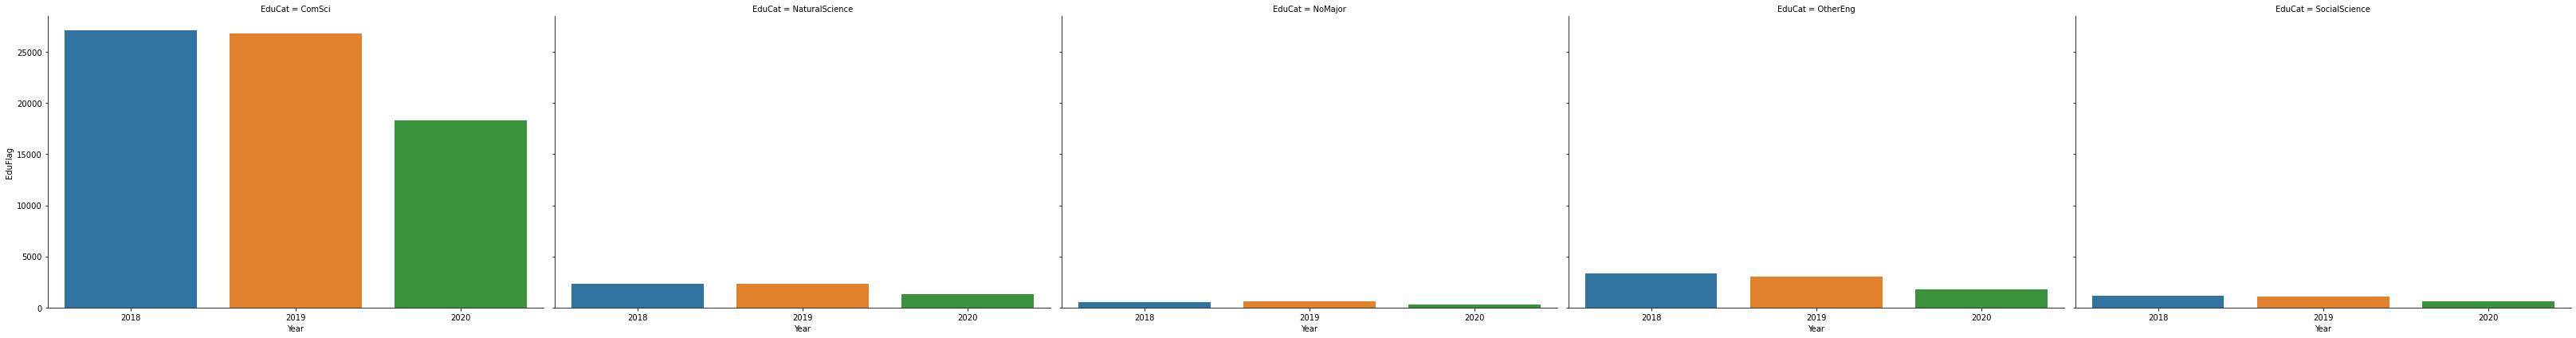

In [22]:
#Create visualisations using bar charts

# Key major groups outlined in the Stack Overflow survey
majors = ['social science','natural science','computer science','development','another engineering','never declared']
 
edudf = df[['Year','UndergradMajor']]
edudf.dropna(how='any', inplace=True)
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)social science'), 'SocialScience'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)natural science'), 'NaturalScience'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)computer science'), 'ComSci'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)development'), 'ComSci'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)another engineering'), 'OtherEng'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)never declared'), 'NoMajor'] = True
 
edudf = edudf.melt(id_vars=['Year'], 
    value_vars=['SocialScience','NaturalScience','ComSci','OtherEng','NoMajor'], 
    var_name='EduCat',
    value_name='EduFlag')
 
edudf.dropna(how='any', inplace=True)
edudf = edudf.groupby(['Year','EduCat']).count().reset_index()
 
eduFig = sns.catplot(x="Year", y='EduFlag', col="EduCat",
                data=edudf, kind="bar",
                height=6, aspect=1.5);

Observations:
Vast majority who enter workforce have some background in comp science

But, number as significantly declined - perhaps there are other majors becoming more popular?

### 5) Examine the relationship between years of experience and compensation

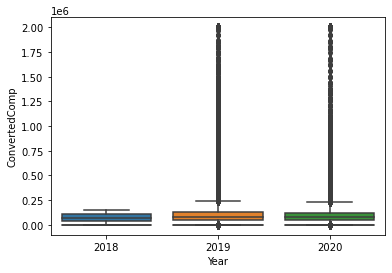

In [24]:
#Exploratory analysis to understand the data
compFields = df[['Year','YearsCodePro','ConvertedComp']]
 
D = sns.boxplot(x="Year", y="YearsCodePro",
            data=compFields)
 
E = sns.boxplot(x="Year", y="ConvertedComp",
            data=compFields)

There are outliers, but most of the data points are pretty consistent across years. Indicates strong correlation

In [27]:
#Loop and fill in missing data using IterativeImputer
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
 
imputedf = df[['YearsCodePro','ConvertedComp']]
 
traindf, testdf = train_test_split(imputedf, train_size=0.1)
 
# Create the IterativeImputer model to predict missing values
imp = IterativeImputer(max_iter=20, random_state=0)
 
# Fit the model to the the test dataset
imp.fit(imputedf)
 
# Transform the model on the entire dataset
compdf = pd.DataFrame(np.round(imp.transform(imputedf),0), columns=['YearsCodePro','ConvertedComp'])

C:\Users\thoma\AppData\Local\Temp\ipykernel_27288\526450179.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compPlotdf['CodeYearBins'] = pd.qcut(compPlotdf['YearsCodePro'], q=5)


<AxesSubplot:xlabel='CodeYearBins', ylabel='ConvertedComp'>

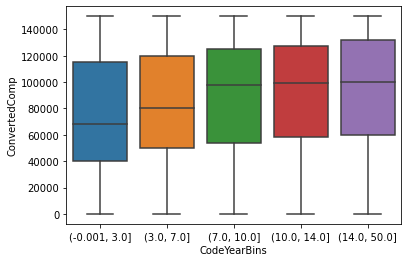

In [28]:
#Analyse relationshiop between YearsCodePro and CinvertedComp

compPlotdf = compdf.loc[compdf['ConvertedComp'] <= 150000]
compPlotdf['CodeYearBins'] = pd.qcut(compPlotdf['YearsCodePro'], q=5)
 
sns.boxplot(x="CodeYearBins", y="ConvertedComp",
            data=compPlotdf)

This confirms that experience appears to correlate with compensation.